IN THIS SECOND STAGE WE SHALL BE WORKING ON COREELATION AND ANOVA
correlation can be said to be the relationship between two variables or how one variable influences the other.
we shall be dealing with how different variables influences the price of cars. we shall also make use of pearsonr in this stage

Anova can be defined as the statistical comparison of groups and we use this to find the correlation between different groups of categorical variables.
we obtain two values from anova:
F-test score: This gives us the variation between sample group means divided by variation within sample group.
P-value: This is the confidence degree in a variable.

In [1]:
# import the modules to be used.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
c_p_f = pd.read_csv('cleanead_car_price.csv')
c_p_f.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,engine-size-binned,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,13495.0,low,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500.0,low,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500.0,medium,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950.0,low,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450.0,low,low,0,1,1,0


In [3]:
c_p_f.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned      object
engine-size-binned     object
fuel-diesel             int64
fuel-gas                int64
aspiration-std          int64
aspiration-turbo        int64
dtype: object

In [6]:
c_p_f.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.007654,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055299,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.157851,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123830,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188796,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.061156,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167357,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205549,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,0.566906,-0.267357,-0.582051,-0.591330,0.543155,0.054452,-0.054452,-0.227807,0.227807
stroke,-0.007654,0.055299,0.157851,0.123830,0.188796,-0.061156,0.167357,0.205549,-0.055390,1.000000,0.187816,0.098175,-0.063027,-0.034336,-0.034962,0.082262,0.240967,-0.240967,-0.218098,0.218098


/tmp/ipykernel_112487/1377562601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = c_p_f.corr()


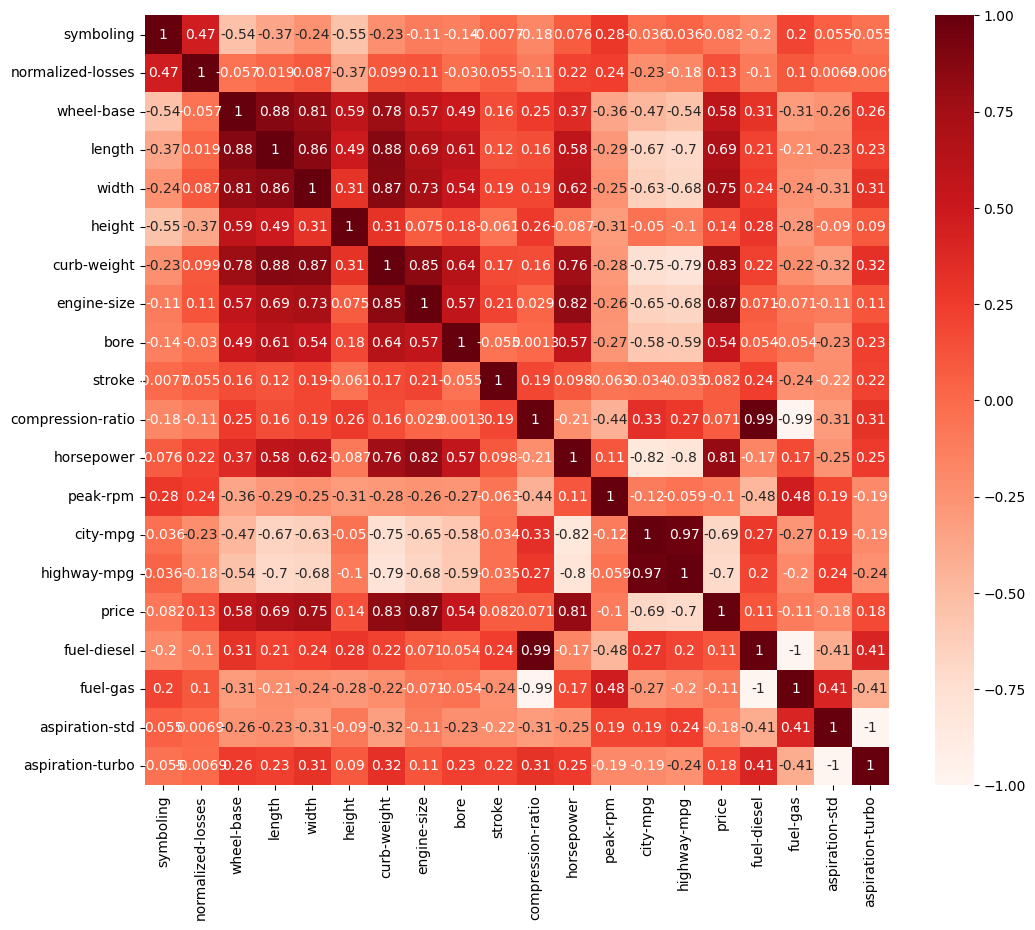

In [46]:
# we can also view the heatmap of the correlation table
corr_matrix = c_p_f.corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

From our correlation table we can point out the columns that have strong and weak correlation with price. Values close to +1 have a strong positive relationship with price while values close to -1 have a strong negative relationship with price. Lastly values close to 0 has weak or no relationship with price and from our table we will differentiate the strong and weak relationship with price.

STRONG RELATIONSHIP ARE:
wheel-base (close to 1 with a values of 0.584),
length (close to 1 with a values of 0.690),
width (close to 1 with a values of 0.751),
curb-weight (close to 1 with a values of 0.834),
engine size (close to 1 with a values of 0.872),
bore (close to 1 with a values of 0.543),
horsepower (close to 1 with a values of 0.809),
city-mpg (close to -1 with a values of -0.686),
highway mpg (close to -1 with a values of -0.704).

WEAK OR NO RELATIONSHIPS ARE:
Symboling,
normalized-loses,
height,
stroke,
compression ratio,
peak-rpm,
fuel-diesel,
fuel-gas,
aspiration-std,
aspiration-turbo.


Now we will do further analysis on columns with strong correlation with price.

Text(0.5, 1.0, 'Relationship between wheelbase with price')

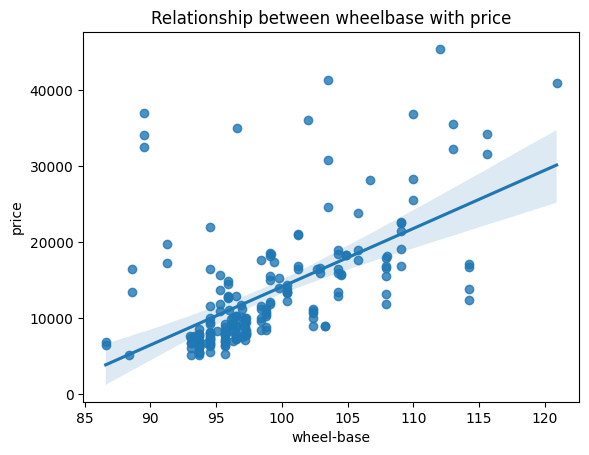

In [14]:
# First the wheelbase column
sns.regplot(x='wheel-base', y='price', data=c_p_f)
plt.title('Relationship between wheelbase with price')

Text(0.5, 1.0, 'Relationship between length with price')

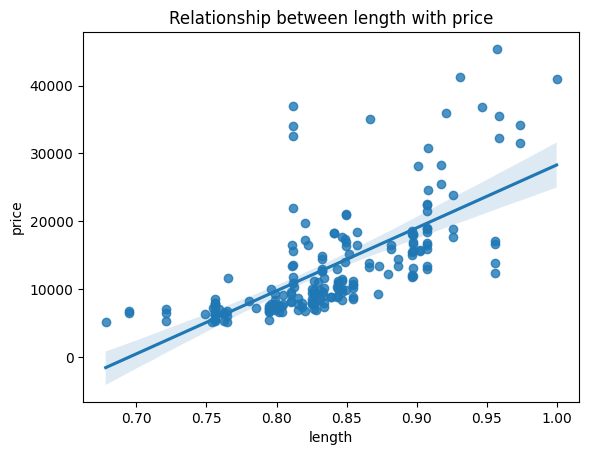

In [15]:
# Second the length

sns.regplot(x='length', y='price', data=c_p_f)
plt.title('Relationship between length with price')

Text(0.5, 1.0, 'Relationship between width with price')

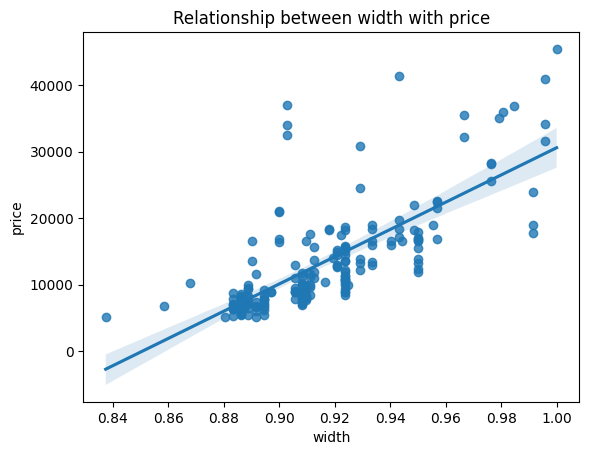

In [16]:
sns.regplot(x='width', y='price', data=c_p_f)
plt.title('Relationship between width with price')

Text(0.5, 1.0, 'Relationship between curb-weight with price')

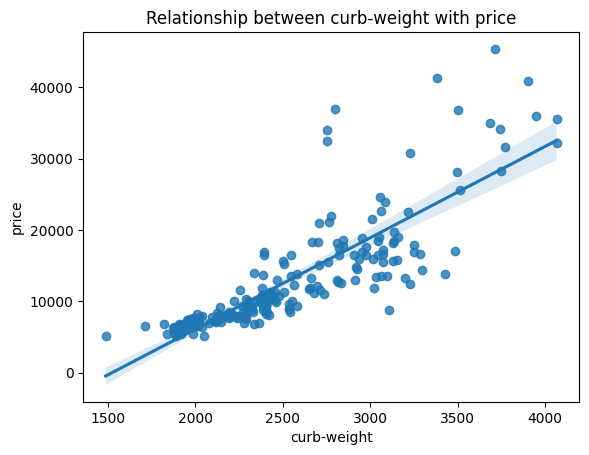

In [17]:
# Fourth the curb-weight
sns.regplot(x='curb-weight', y='price', data=c_p_f)
plt.title('Relationship between curb-weight with price')

Text(0.5, 1.0, 'Relationship between engine-size with price')

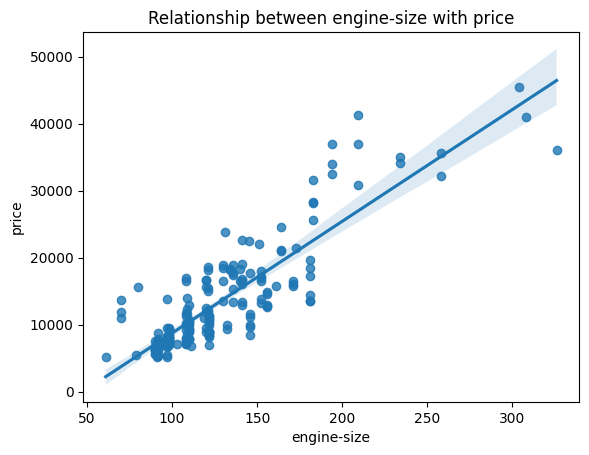

In [18]:
# Fifth the engine-size

sns.regplot(x='engine-size', y='price', data=c_p_f)
plt.title('Relationship between engine-size with price')

Text(0.5, 1.0, 'Relationship between bore with price')

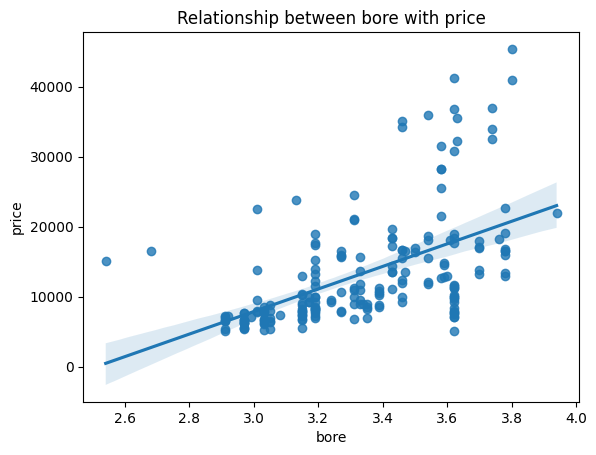

In [19]:
# Sixth the bore

sns.regplot(x='bore', y='price', data=c_p_f)
plt.title('Relationship between bore with price')

Text(0.5, 1.0, 'Relationship between city-mpg with price')

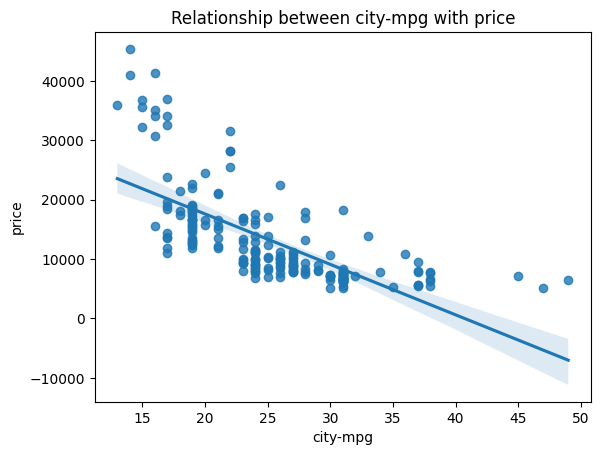

In [20]:
# Eight the city-mpg

sns.regplot(x='city-mpg', y='price', data=c_p_f)
plt.title('Relationship between city-mpg with price')

Text(0.5, 1.0, 'Relationship between joghway-mpg with price')

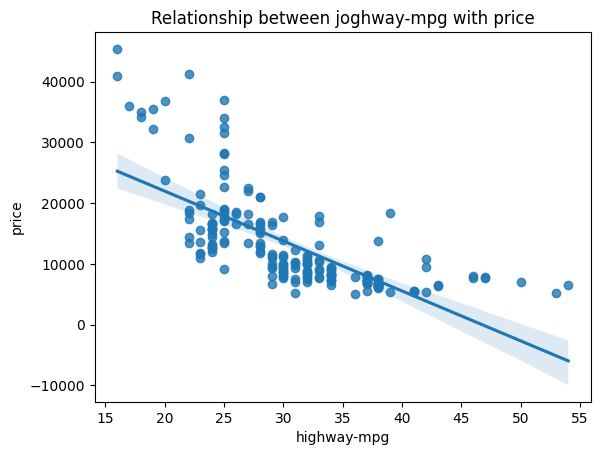

In [21]:
# Ninth highway-mpg

sns.regplot(x='highway-mpg', y='price', data=c_p_f)
plt.title('Relationship between joghway-mpg with price')


In [22]:
c_p_f.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,engine-size-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low,low
freq,32,115,94,118,198,145,157,92,153,158


We shall visualize some of the columns and see how they affect price

Text(0.5, 1.0, 'Scatter plot of num-of-doors Vs Price')

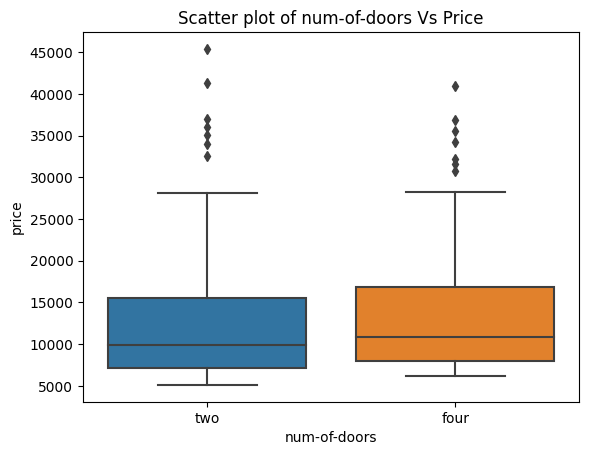

In [26]:
sns.boxplot(x="num-of-doors", y="price", data=c_p_f)
plt.title('Scatter plot of num-of-doors Vs Price')

Text(0.5, 1.0, 'Scatter plot of body-style Vs Price')

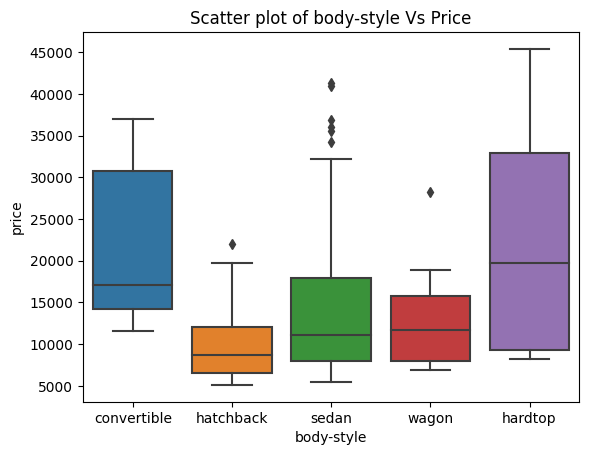

In [27]:
sns.boxplot(x="body-style", y="price", data=c_p_f)
plt.title('Scatter plot of body-style Vs Price')

Text(0.5, 1.0, 'Scatter plot of engine-location Vs Price')

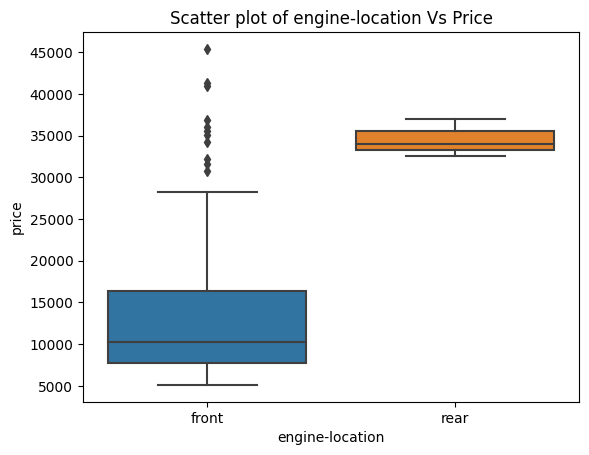

In [28]:
sns.boxplot(x="engine-location", y="price", data=c_p_f)
plt.title('Scatter plot of engine-location Vs Price')

Text(0.5, 1.0, 'Scatter plot of horsepower-binned Vs Price')

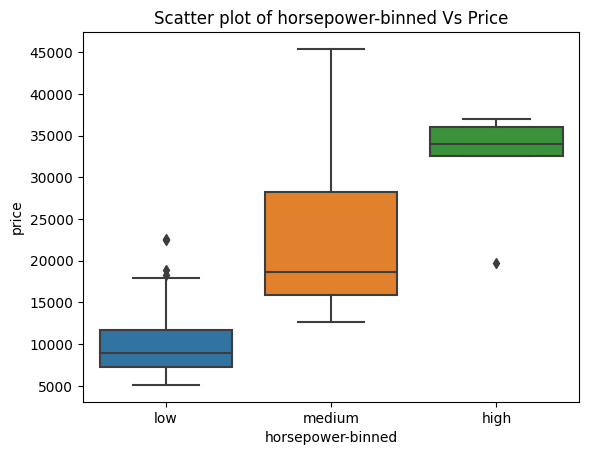

In [29]:
sns.boxplot(x="horsepower-binned", y="price", data=c_p_f)
plt.title('Scatter plot of horsepower-binned Vs Price')

Text(0.5, 1.0, 'Scatter plot of drive-wheels Vs Price')

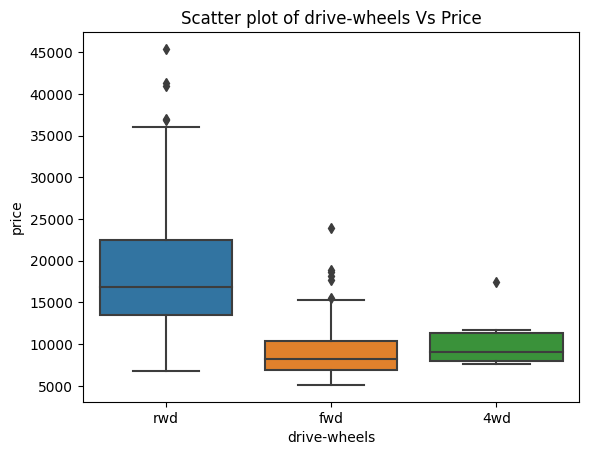

In [31]:
sns.boxplot(x="drive-wheels", y="price", data=c_p_f)
plt.title('Scatter plot of drive-wheels Vs Price')

In [32]:
# We get the value count of drive-wheels
c_p_f['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [33]:
c_p_f['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

<Axes: xlabel='engine-location', ylabel='Count'>

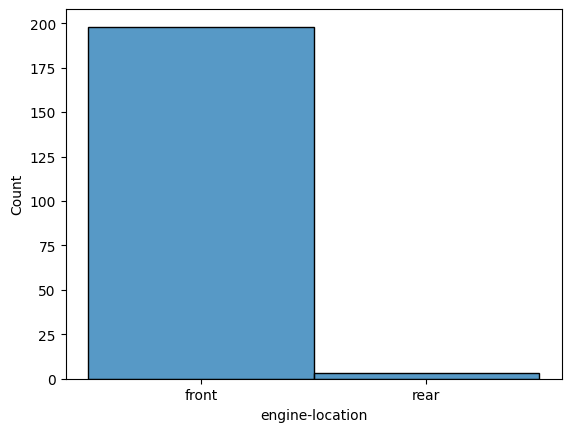

In [35]:
sns.histplot(c_p_f['engine-location'])

<Axes: xlabel='drive-wheels', ylabel='Count'>

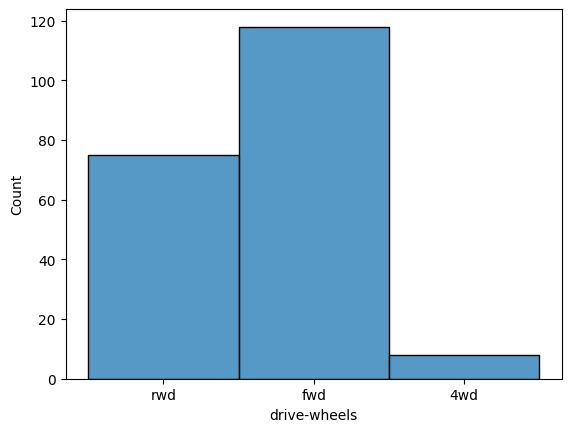

In [36]:
sns.histplot(c_p_f['drive-wheels'])

We are going to take a look at pearsonr correlation.
pearsonr correlation is the measure of strength between of the correlation between the correlation coefficient and the p-value.
The p-value is a statistical measure that helps to evaluate the strength of evidence against a null hypothesis.

By convention, when the

p-value is 
 0.001: we say there is strong evidence that the correlation is significant.
the p-value is 
 0.05: there is moderate evidence that the correlation is significant.
the p-value is 
 0.1: there is weak evidence that the correlation is significant.
the p-value is 
 0.1: there is no evidence that the correlation is significant.

In [37]:
x = c_p_f['wheel-base']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.584641822265508
p-value: 8.076488270732885e-20


In [38]:
x = c_p_f['length']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.6906283804483639
p-value: 8.01647746615924e-30


In [39]:
x = c_p_f['width']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.7512653440522675
p-value: 9.200335510480491e-38


In [40]:
x = c_p_f['curb-weight']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.8344145257702844
p-value: 2.189577238893965e-53


In [41]:
x = c_p_f['engine-size']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.8723351674455185
p-value: 9.265491622198793e-64


In [42]:
x = c_p_f['bore']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.5431549770315166
p-value: 8.049696658365048e-17


In [43]:
x = c_p_f['horsepower']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.8096068016571054
p-value: 6.273536270650351e-48


In [44]:
x = c_p_f['city-mpg']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.6865710067844678
p-value: 2.3211320655675098e-29


In [45]:
x = c_p_f['highway-mpg']
y = c_p_f['price']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.7046922650589529
p-value: 1.7495471144476463e-31


ANALYSIS OF VARIANCE, ANOVA.
Anova is simply the statistical comparison of groups. Anova is strictly performed to find the corr() between groups and categorical values.
We obtain two values from anova, that is:
F-test score: which is the variation between sample group means divided by variation within sample group.
P-value: This is simply the confidence of degree of our calculated score value.

In [48]:
# we pick a categorical value and group it with price
c_p_f_anova = c_p_f[['drive-wheels', 'price']]
g_anova = c_p_f_anova.groupby(['drive-wheels'])
g_anova.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [49]:
f_value, p_value =stats.f_oneway(g_anova.get_group('fwd')['price'], g_anova.get_group('4wd')['price'], g_anova.get_group('rwd')['price'])
print('Anova results: F=', f_value, 'P=', p_value)

Anova results: F= 67.95406500780398 P= 3.3945443577151245e-23


We create a table of values with strong correlation and save it to a csv file, the prceed to build our model.

In [50]:
g = c_p_f[['length', 'width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore','drive-wheels','price']]
g

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,13495.0
1,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,16500.0
2,0.822681,0.909722,2823,152,154,19,26,94.5,2.68,rwd,16500.0
3,0.848630,0.919444,2337,109,102,24,30,99.8,3.19,fwd,13950.0
4,0.848630,0.922222,2824,136,115,18,22,99.4,3.19,4wd,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
196,0.907256,0.956944,2952,141,114,23,28,109.1,3.78,rwd,16845.0
197,0.907256,0.955556,3049,141,160,19,25,109.1,3.78,rwd,19045.0
198,0.907256,0.956944,3012,173,134,18,23,109.1,3.58,rwd,21485.0
199,0.907256,0.956944,3217,145,106,26,27,109.1,3.01,rwd,22470.0


In [ ]:
g.to_csv('car_price_features.csv',index=False)